In [3]:
import matplotlib.pyplot as plt

In [4]:
%run '../scripts/execute_query.ipynb'

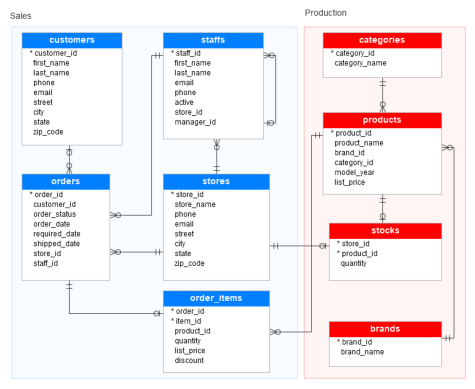

In [5]:
%run 'schema.ipynb'

#### Which brand has the most products in the store?

In [6]:
query="""
SELECT b.brand_name,
COUNT(p.product_id) AS product_count
FROM brands b
LEFT JOIN products p
USING (brand_id)
GROUP BY b.brand_id
ORDER BY product_count DESC;
"""
df=execute_query(query)
df

,brand_name,product_count
0,Trek,135
1,Electra,118
2,Surly,25
3,Sun Bicycles,23
4,Haro,10
5,Strider,3
6,Pure Cycles,3
7,Heller,3
8,Ritchey,1


Text(0.5, 1.0, 'Product Count per Brand')

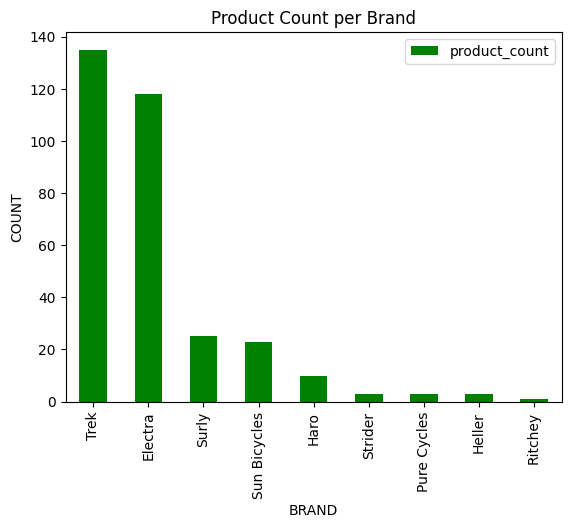

In [7]:
df.plot(kind='bar',x='brand_name' ,y='product_count',legend='False',color='green')
plt.xlabel('BRAND')
plt.ylabel('COUNT')
plt.title("Product Count per Brand")

#### Which product is the most ordered?

In [8]:
query="""
SELECT product_id,product_name,
SUM(quantity) as product_count_in_orders
FROM orders 
JOIN order_items 
USING(order_id)
JOIN products
USING (product_id)
GROUP BY product_id
ORDER BY product_count_in_orders DESC
LIMIT 1
"""
execute_query(query)

,product_id,product_name,product_count_in_orders
0,6,Surly Ice Cream Truck Frameset - 2016,167


##### Which product had the maximum revenue?

In [25]:
query="""
SELECT product_id,product_name,
    SUM(oi.quantity*(oi.list_price-oi.list_price*oi.discount)) as total_sale_price
FROM products p
JOIN order_items oi
USING (product_id)
group by product_id
order by total_sale_price DESC
LIMIT 1
"""
execute_query(query)

,product_id,product_name,total_sale_price
0,7,Trek Slash 8 27.5 - 2016,555558.6111
